<a href="https://colab.research.google.com/github/Dhruthishivani/Breast-Cancer-Detection-/blob/main/GenAI_Day_2_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [ ]:
data=pd.read_csv('/data_day5.csv')

In [ ]:
data.head(12)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.shape

(569, 31)

In [ ]:
data.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


<Axes: xlabel='diagnosis', ylabel='count'>

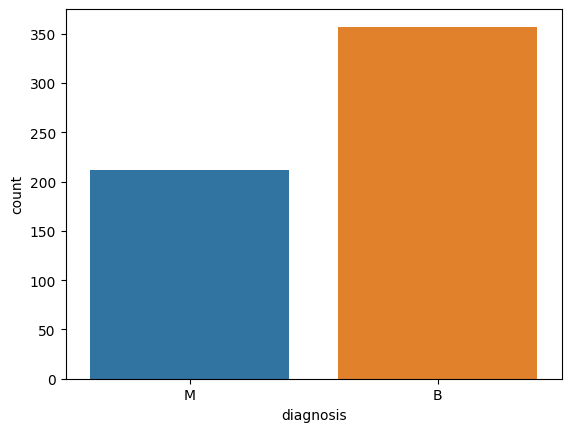

In [ ]:
sns.countplot(data=data,x='diagnosis',hue="diagnosis")

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['diagnosis']=encoder.fit_transform(d['diagnosis'])

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.diagnosis.value_counts()

,count
diagnosis,
0,357
1,212


In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x=data.drop('diagnosis',axis=1)
y=data.diagnosis.values

In [ ]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
x.shape

(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(455, 30)

In [ ]:
y_train.shape

(455,)

In [ ]:
x_test.shape

(114, 30)

In [ ]:
y_test.shape

(114,)

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class TabularData(Dataset):
    def __init__(self,x,y):
      super().__init__()
      self.x=torch.from_numpy(x).type(torch.float32)
      self.y=torch.from_numpy(y).type(torch.float32)

    def __len__(self):
      return len(self.x)

    def __getitem__(self,id):
      return self.x[id],self.y[id]

In [ ]:
train_data=TabularData(x_train,y_train)

In [ ]:
len(train_data)

455

In [ ]:
train_data[3]

(tensor([-0.9876,  1.3800, -0.9869, -0.8757,  0.0149, -0.6065, -0.8162, -0.8452,
          0.3117,  0.0698, -0.5611,  0.5010, -0.6777, -0.5214,  0.0493, -0.8455,
         -0.6991, -0.9004,  0.1256, -0.4448, -0.8323,  1.5491, -0.8722, -0.7469,
          0.7685, -0.7282, -0.7661, -0.8108,  0.8222, -0.1372]),
 tensor(0.))

In [ ]:
train_loader=DataLoader(train_data,batch_size=8,shuffle=True)

In [ ]:
class BinClr(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.order=torch.nn.Sequential(
        torch.nn.Linear(in_features=30,out_features=32),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=32,out_features=16),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=16,out_features=1),
    )
  def forward(self,x:torch.Tensor):
    return self.order(x)



In [ ]:
class BinClr(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = torch.nn.Linear(in_features=30, out_features=32)
    self.layer2 = torch.nn.Linear(in_features=32, out_features=16)
    self.layer3 = torch.nn.Linear(in_features= 16, out_features=1)
    self.relu = torch.nn.ReLU()

  def forward(self, x : torch.Tensor):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
model=BinClr().to(device)

In [ ]:
model

BinClr(
  (layer1): Linear(in_features=30, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.0430, -0.0081,  0.0429, -0.0288,  0.1221,  0.1763,  0.1084,  0.0057,
                       -0.0468,  0.0642, -0.1509,  0.1370, -0.1173, -0.0801, -0.0193,  0.1641,
                       -0.0656, -0.1497, -0.1717,  0.0438,  0.1593,  0.0249, -0.0484, -0.1309,
                       -0.1271,  0.0192, -0.0912, -0.1216,  0.1457,  0.0577],
                      [ 0.1819,  0.0021, -0.1382,  0.1504, -0.0616,  0.0311,  0.1400, -0.0214,
                       -0.1823, -0.1417, -0.1538, -0.0487,  0.0960,  0.1316,  0.1630, -0.1039,
                       -0.1417,  0.0558,  0.0823, -0.0076,  0.0224,  0.1704,  0.1290, -0.1708,
                       -0.0648,  0.1515,  0.1800, -0.0444,  0.0026,  0.1368],
                      [ 0.1636, -0.1433, -0.0205, -0.0497, -0.0177, -0.1072,  0.0846, -0.1574,
                        0.0785,  0.0667,  0.0184,  0.0429,  0.0482, -0.1470,  0.0891, -0.0436,
                        0.0162, -0.1392, -0.0034, -0.

In [ ]:
(torch.sigmoid(model(next(iter(train_loader))[0].type(torch.float32)))>=0.5).type(torch.int)

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.int32)

In [ ]:
loss = torch.nn.BCELoss()#Binary cross entropy loss
optim = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [ ]:
epochs=15
for epoch in range(epochs):
      temp_loss=[]
      for i,(features,target) in enumerate(train_loader):
        model.train()

        y_pred=torch.sigmoid(model(features))
        loss_fn=loss(y_pred.squeeze(),target)
        temp_loss.append(loss_fn.item())

        optim.zero_grad()
        loss_fn.backward()
        optim.step()
      print(f"Epoch {epoch} | loss: (sum(temp_loss)/len(temp_loss))")

Epoch 0 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 1 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 2 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 3 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 4 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 5 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 6 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 7 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 8 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 9 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 10 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 11 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 12 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 13 | loss: (sum(temp_loss)/len(temp_loss))
Epoch 14 | loss: (sum(temp_loss)/len(temp_loss))


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
x_test.shape

(114, 30)

In [ ]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
y_pred = torch.sigmoid(model(torch.from_numpy(x_test).type(torch.float32))).detach().numpy()

In [ ]:
y_pred=(y_pred>=0.5).astype(int).squeeze()

In [ ]:
score=100*(accuracy_score(y_test,y_pred))

In [ ]:
score

98.24561403508771

<Axes: >

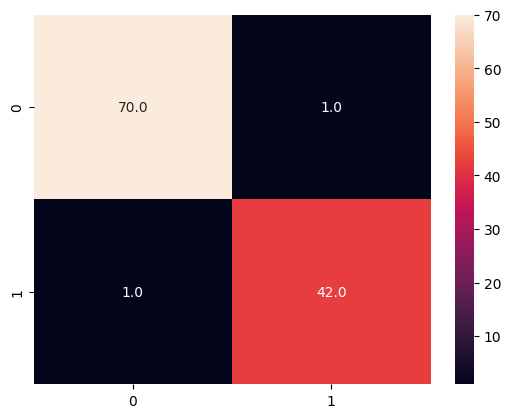

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='.1f', annot=True)

In [ ]:
#predictive system

In [ ]:
patient1=x_train[1]

In [ ]:
result = (torch.sigmoid(model(torch.from_numpy(patient1).type(torch.float32)))>=0.5).type(torch.int)[0]

In [ ]:
if result==0:
  print("It is Benign")
else:
  print("It is Malignant")

It is Malignant
